In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
D=pd.read_csv("../Titanic/train.csv")
D.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
D.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
D.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Lets adress Embankment

In [5]:
print(D.Fare[D.Embarked.isnull()])

61     80.0
829    80.0
Name: Fare, dtype: float64


we can see that the embarked has two missing values. We first checked if these passengers had any family so that we could use that information to fill in these gaps. Nope. But we find that they paid the same amount of fare. lets see the fair distribution vs Embarkment and use that to fill these. To do that lets drop the nan rows for now



Text(0,0.5,'Fare')

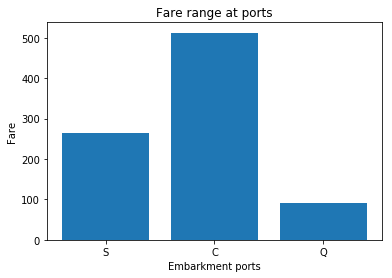

In [6]:
Dtemp=D[pd.notnull(D.Embarked)]
plt.bar(Dtemp.Embarked,Dtemp.Fare)
plt.title('Fare range at ports')
plt.xlabel('Embarkment ports')
plt.ylabel('Fare')
# Dtemp.Embarked.unique()

In [7]:
D.Embarked=D.Embarked.fillna('Q')

Lets convert Embarked into Numeric lets create a function to handle all categorical, numeric conversions

In [8]:
def conversions(series):
    series=series.astype('category').cat.codes
    return(series)

In [9]:
D.Embarked=conversions(D.Embarked)

In [10]:
D.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2


Cabin being empty could suggest that people didnt have a cabin? maybe low fares? lets check

In [11]:
def firstletter(strin):
        if type(strin)==str:  
            return(strin[0])

In [12]:
action=lambda x: firstletter(x)
D.Cabin=D.Cabin.apply(action)

In [13]:
D.Cabin.fillna(0,inplace=True)
D.Cabin=conversions(D.Cabin)

In [14]:
D['Fam']=D.SibSp+D.Parch

In [15]:
D.drop(['SibSp','Parch'],axis=1,inplace=True)

In [16]:
AS=D.groupby('Age')['Survived'].mean()

In [17]:
# D.Age.fillna(0)
D.Age.fillna(100,inplace=True)

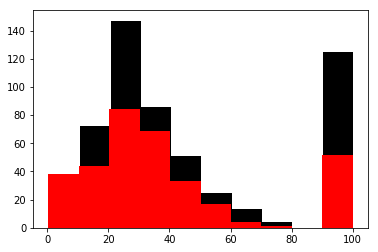

In [18]:
Sur=D.Age[D.Survived==0]
Died=D.Age[D.Survived==1]
p1=plt.hist(Sur,color='black')
p2=plt.hist(Died,color='red')
# plt.legend((p1, p2), ('Sur', 'Died'))

In [19]:
D.Sex=conversions(D.Sex)

In [22]:
#SurNames
def fames(names):
#         print(names)
        names=names.split()
        names=names[1].strip('.')
        names=names.strip(',')
#         print(names)
        return names
    

In [23]:
ap=lambda x: fames(x)
D['FirstName']=D.Name.apply(ap)

In [46]:
# D.drop(['Ticket','Name'],axis=1)

In [ ]:
# CabinSuvive=D.pivot_table(index='Cabin',values='Survived')

In [ ]:
# CabinSuvive.plot.bar()

In [26]:
D.FirstName.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Planke', 'Don', 'Rev', 'Billiard',
       'der', 'Walle', 'Dr', 'Pelsmaeker', 'Mulder', 'y', 'Steen',
       'Carlo', 'Mme', 'Impe', 'Ms', 'Major', 'Gordon', 'Messemaeker',
       'Mlle', 'Col', 'Capt', 'Velde', 'the', 'Shawah', 'Jonkheer',
       'Melkebeke', 'Cruyssen'], dtype=object)

In [27]:
FN=D.groupby('FirstName')['Survived'].count()

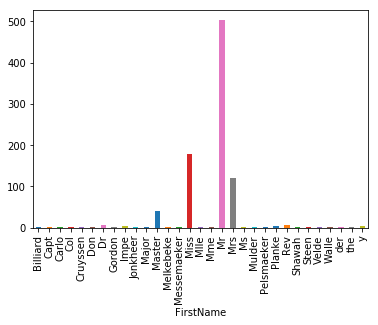

In [28]:
FN.plot.bar()

In [33]:
dict={'Master':1,'Miss':2,'Mr':3,'Mrs':4}
def encodetitle(val):
    if val not in dict.keys():
        return 0
    else: 
        return(dict[val])
    
        

For simplicity we'll use these as a way to fill Cabins


In [36]:
ap2=lambda x: encodetitle(x)
D['Surname']=D.FirstName.apply(ap2)

In [37]:
D.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Fam,FirstName,Surname
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,2,1,Mr,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,3,0,1,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,2,0,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,3,2,1,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,2,0,Mr,3


In [44]:
D.drop(['Name','Ticket','FirstName'],axis=1,inplace=True)

In [45]:
D.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Fam,Surname
0,1,0,3,1,22.0,7.2500,0,2,1,3
1,2,1,1,0,38.0,71.2833,3,0,1,4
2,3,1,3,0,26.0,7.9250,0,2,0,2
3,4,1,1,0,35.0,53.1000,3,2,1,4
4,5,0,3,1,35.0,8.0500,0,2,0,3


In [59]:
FS=D.Fam[D.Survived==1]
FD=D.Fam[D.Survived==0]

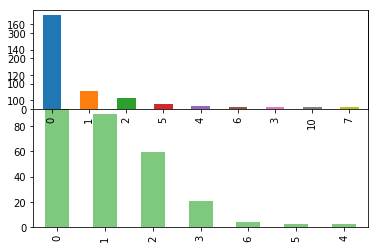

In [97]:
import matplotlib.cm as cm
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax=FS.value_counts().plot.bar(cmap='Accent')
ax2=fig.add_subplot(2,1,1)

ax2=FD.value_counts().plot.bar()

In [101]:
Dy=D.Survived
D.drop('Survived',axis=1,inplace=True)

In [102]:
from sklearn. model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(D,Dy,test_size=0.33)

In [104]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train,Y_train)
model.score(X_test,Y_test)

0.8169491525423729

In [105]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=0).fit(X_train,Y_train)
model2.score(X_test,Y_test)

0.7152542372881356

In [108]:
from sklearn.svm import SVC
model3=SVC(gamma='auto').fit(X_train,Y_train)
model3.score(X_test,Y_test)


0.6610169491525424

In [109]:
from sklearn.ensemble import RandomForestClassifier

model4= RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
model4.fit(X_train, Y_train)
model4.score(X_test,Y_test)

0.8305084745762712